# Frequentist vs Bayesian statistics.

We are going to compute the initial velocity of a parabolic projectile using the error propagation analysis,
the frequentist analysis and the Bayesian analysis.

## The problem:
    
Suppose you measure the height $h$ and the range $R$ of a projectile in a parabolic motion.

After measuring a lot of times we get the following results:

$R = 10.0 \pm 0.2 m$

$h = 1.0 \pm 0.2 m$

## Parabolic motion equations.

How to get the initial velocities from the height $h$ and the range $R$

The equations are:

\begin{equation}
h = \frac{1}{2} g v_y^2
\end{equation}

\begin{equation}
R = \frac{2 v_x v_y}{g}
\end{equation}

\begin{equation}
v_x = \sqrt{\frac{g}{8}}\frac{R}{\sqrt{h}}
\end{equation}

\begin{equation}
v_y = \sqrt{2gh}
\end{equation}



# 1. Error propagation

In this method we simply put our measured values $R$ and $h$ in the equations of $v_x$ and $v_y$

$v_x^{0} = \sqrt{\frac{g}{8}} \frac{10}{\sqrt{1}} = 11.2 m s^{-1}$

$v_y^{0} = \sqrt{2g1} = 4.47 m s^{-1}$

$ln v_x = ln \sqrt{\frac{g}{8}} + ln R - \dfrac{1}{2} ln h$

The corresponding errors would be:

$\frac{\sigma_{v_x}}{v_x} = \sqrt{ \left( \frac{\sigma_{R}}{R} \right)^2 + \frac{1}{4}\left( \frac{\sigma_h}{h} \right)^2} = 0.1$

$\frac{\sigma_{v_y}}{v_y} = \dfrac{1}{R} \dfrac{\sigma_h}{h} = 0.1$

In [23]:
%pylab inline
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [24]:
vx_ep_best = 11.2
vy_ep_best = 4.47
# Histogram from the error propagation
vx_ep = np.random.normal(vx_ep_best, 0.1, 10000)
vy_ep = np.random.normal(vy_ep_best, 0.1, 10000)

(8, 20)

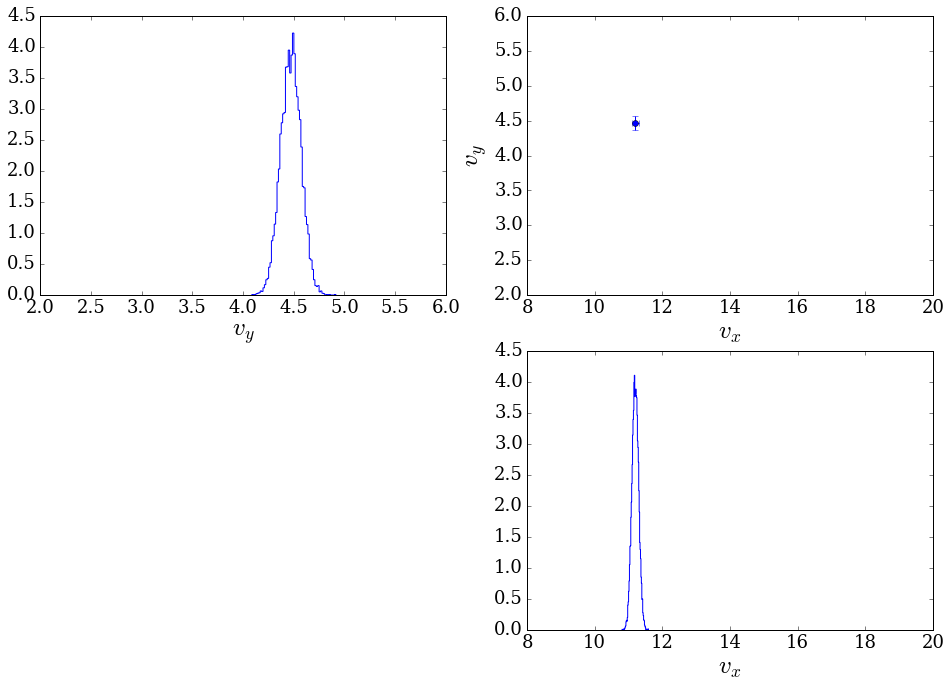

In [57]:
figure(figsize=(16, 11))


subplot(2, 2, 1)
h_vy_ep = hist(vy_ep, bins=60, histtype='step', label='Error propagation', normed=True)
xlabel('$v_y$', fontsize=25)
xlim(2, 6)

subplot(2, 2, 2)
plt.errorbar(vx_ep_best ,vy_ep_best, yerr = 0.1, xerr=0.1,  marker='o')
xlim(8, 20)
ylim(2, 6)
xlabel('$v_x$', fontsize=25)
ylabel('$v_y$', fontsize=25)

subplot(2, 2, 4)
h_vx_ep = hist(vx_ep, bins=60, histtype='step', label='Error propagation', normed=True)
xlabel('$v_x$', fontsize=25)
xlim(8, 20)



# 2. Monte Carlo method (Using frenquitist statistics)
Note: Monte Carlo method is just the the method that I am using to compute the distribution function, it doesn't tell anything about the statistics that I am using.

### Let's sample the two probability distributions corresponing to the measured values of $h$ and $R$

In [40]:
h = np.random.normal(1.0, 0.2, 10000)
R = np.random.normal(10.0, 0.2, 10000)

### And let's compute the initial velocities using the previous probability distributions

In [41]:
g = 9.8
def velocities(h, R):
    vx = np.sqrt(g/8.0) * R / np.sqrt(h)
    vy = np.sqrt(2*g*h)
    return vx, vy

In [42]:
vx_mc, vy_mc = velocities(h, R)

In [43]:
# This is the correlation given by R
vx_1= np.linspace(7, 25)
vy_1 = 10.0*g/(2.0*vx_1)

(8, 20)

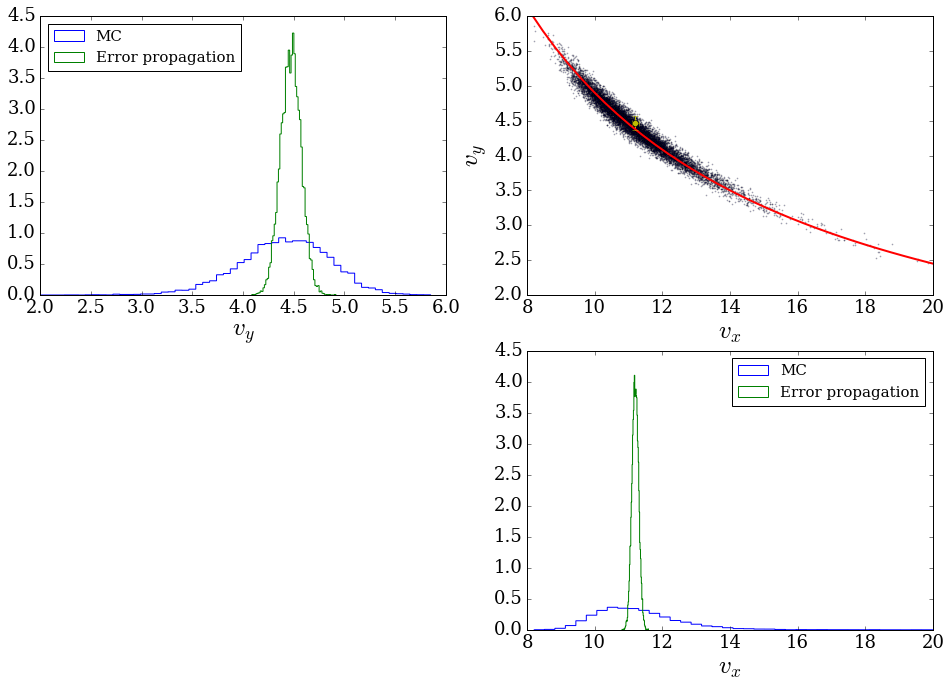

In [68]:
figure(figsize=(16, 11))

subplot(2, 2, 1)
h1 = hist(vy_mc, bins=60, histtype='step', label='MC', normed=True)
h12 = hist(vy_ep, bins=60, histtype='step', label='Error propagation', normed=True)
legend(loc='best', fontsize=15)
xlabel('$v_y$', fontsize=25)
xlim(2, 6)


subplot(2, 2, 2)
scatter(vx_mc, vy_mc, s=0.5, alpha=0.3)
plot(vx_1, vy_1, c='r', lw=2.0)
plt.errorbar(vx_ep_best ,vy_ep_best, yerr = 0.1, xerr=0.1,  marker='o', c='y')
xlabel('$v_x$', fontsize=25)
ylabel('$v_y$', fontsize=25)
xlim(8, 20)
ylim(2, 6)

subplot(2, 2, 4)
h2 = hist(vx_mc, bins=60, histtype='step', label='MC', normed=True)
h22 = hist(vx_ep, bins=60, histtype='step', label='Error propagation', normed=True)
xlim(7, 25)
legend(loc='best', fontsize=15)
xlabel('$v_x$', fontsize=25)
xlim(8, 20)


In [ ]:
# The shape of the joint distribution function:

In [69]:
index_1 = np.where(h1[0]==max(h1[0]))[0]
index_2 = np.where(h2[0]==max(h2[0]))[0]

print h1[1][index_1]
print h2[1][index_2]

[ 4.44156338]
[ 10.96963752]


we see that the values of $vx$ and $vy$ using the montecarlo method are highly correlated, one of the observables (R) is more tighly constrait that the other one.

HW: over plot the confidence levels, and the most likely values from the code of last class.

## Say always, I use frenquitis/Baysian, compute the likelihood with MC or Analyticaly, and the convergence algoroth say (Metropolis)

# 3. analyticaly method to compute the likelihood  if you have low number of parameters.

\begin{equation}
P(R, h)dR dh = P(v_x, v_y)dv_x dv_y
\end{equation}

\begin{equation}
P(R, h) = G(R;R_0, \sigma_R ) G(h;h_0,\sigma_h) 
\end{equation}

\begin{equation}
P(v_x, v_y) = G(R; R_0, \sigma_R) G(h;h_0,\sigma_h) J\left( \frac{R, h}{v_x, v_y}\right)
\end{equation}

\begin{equation}
J\left( \frac{R, h}{v_x, v_y}\right) = \frac{2v_y^2}{y^2}
\end{equation}

\begin{equation}
P(v_x, v_y)dv_x dv_y = \frac{v_y^2}{\sqrt{2\pi \sigma_R^2}} e^{-\frac{(R-R_0)^2}{2\sigma_R}} e^{-\frac{(h-h_0)^2}{2\sigma_h}} dv_x dv_y
\end{equation}


Marginalizing over $v_x$ we get:

\begin{equation}
P(v_y) = \int P(v_x, v_y) dv_x
\end{equation}


\begin{equation}
P(v_y) = \frac{u_y^2}{\pi \sigma_R \sigma_h g^2} e^{\frac{\left(\frac{v_y^2}{2g} - h\right)^2}{2\sigma_{v_y}}} \int_{-\infty}^{\infty} dv_x e^{-\frac{\left(\frac{2v_y}{g} - R_0\right)^2}{2\sigma_R^2}} 
\end{equation}

\begin{equation}
I = \int_{-\infty}^{\infty} dv_x e^{-\frac{1}{2}\left(\frac{2v_yv_x}{g\sigma_R} - \frac{R_0}{\sigma_R}\right)^2} = \frac{\sqrt{2\pi} g \sigma_R}{2 v_y}
\end{equation}


\begin{equation}
P(v_y) = \frac{u_y}{\sqrt{2\pi}  \sigma_h g} e^{\frac{\left(\frac{v_y^2}{2g} - h\right)^2}{2\sigma_{v_y}}} 
\end{equation}

In [72]:
def Puxuy(ux, uy, sigma_r, sigma_h):
    P = uy**2/(np.pi*sigma_r*sigma_h*g**2) * exp(-(R-R_0)**2/(2*sigma_r))
    

In [73]:
def Puy(uy, sigma_h, h_0):
    g = 10.0
    puy = uy/(np.sqrt(2.0*np.pi)*sigma_h*g)*exp(-(uy**2/(2.0*g) - h_0)**2.0/(2.0*sigma_h**2))
    return puy

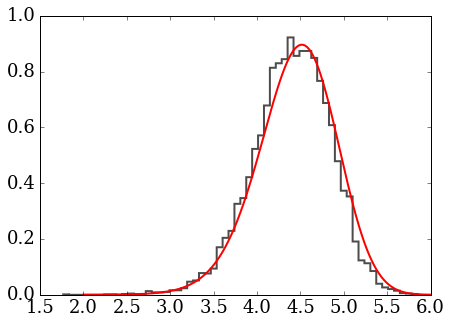

In [96]:
figure(figsize=(7, 5))
uy_an = linspace(2, 6.0, 1000)
puy_an = Puy(uy_an, 0.2, 1.0)
plot(uy_an,puy_an, lw=2, c='r')
h1 = hist(vy_mc, bins=60, histtype='step', label='MC', normed=True, color='k', lw=2, alpha=0.7)


# 4. Bayesian approach

In [75]:
def Puy_bayes(u_y, sigma_h, h_0):
    g = 10.0
    puy = 1/(u_y)*exp(-(u_y**2/(2.0*g) - h_0)**2.0/(2.0*sigma_h**2))
    return puy

In [92]:
puy_an_bayes = Puy_bayes(uy_an, 0.2, 1.0)
I = sum(puy_an_bayes)*(uy_an[2]-uy_an[1])

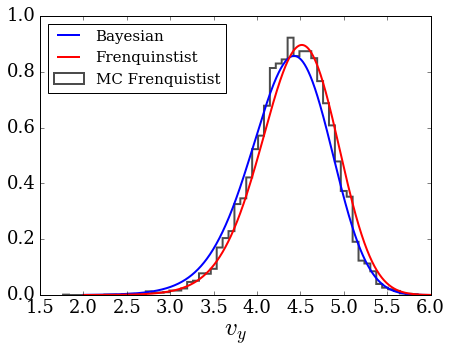

In [97]:
figure(figsize=(7, 5))
plot(uy_an, puy_an_bayes/I, label='Bayesian', lw=2)
plot(uy_an, puy_an, label='Frenquinstist', lw=2, c='r')
h1 = hist(vy_mc, bins=60, histtype='step', label='MC Frenquistist', normed=True, color='k', lw=2, alpha=0.7)
legend(loc='best', fontsize=15)
xlabel('$v_y$', fontsize=25)